# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [18]:
# Fetch current BTC price
btc_response_data = requests.get(btc_url).json()
btc_response_data

# Fetch current ETH price
eth_response_data = requests.get(eth_url).json()
eth_response_data

# Compute current value of my crypto
btc_current_value = btc_response_data['data']['1']['quotes']['USD']['price']
eth_current_value = eth_response_data['data']['1027']['quotes']['USD']['price']

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${btc_current_value:0.2f}") #0.2f prints two decimals on a float
print(f"The current value of your {my_eth} ETH is ${eth_current_value:0.2f}")

The current value of your 1.2 BTC is $54899.00
The current value of your 5.3 ETH is $3539.17


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [20]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [22]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
alpaca_end_point = os.getenv("ALPACA_END_POINT")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2",
    base_url= alpaca_end_point)

In [31]:
# Format current date as ISO format
today = pd.Timestamp("2021-10-8", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today,
    limit = 1000
).df

# Preview DataFrame
df_portfolio

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-10-08 00:00:00-04:00  114.31  114.35  114.07  114.12  4207570  439.48   

                                                             
                             high     low   close    volume  
time                                                         
2021-10-08 00:00:00-04:00  439.89  437.19  437.82  57510090

In [32]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.12
Current SPY closing price: $437.82


In [33]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21891.00
The current value of your 200 AGG shares is $22824.00


### Savings Health Analysis

In [44]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_assets = btc_current_value + eth_current_value  #adding together all crypto
stock_bond_assets = my_agg_value + my_agg_value #adding together all stocks and bonds

value_data = {
    'amount': [crypto_assets, stock_bond_assets],
    'asset': ["crypto", "shares"]
}

# Create savings DataFrame
df_savings = pd.DataFrame(value_data).set_index('asset')

# Display savings DataFrame
display(df_savings)

,amount
asset,
crypto,58438.17
shares,45648.00


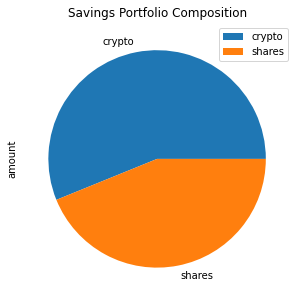

In [50]:
# Plot savings pie chart
pie_chart = df_savings.plot.pie(y= 'amount', title="Savings Portfolio Composition", figsize=(5,5))

In [63]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings['amount'].sum()


# Validate saving health

#If total savings are greater than the emergency fund, display a message congratulating the person for having enough money in this fund.
if total_savings > emergency_fund:
    print(f"Congratulations! You have enough money in your emergency fund.")

#If total savings are equal to the emergency fund, display a message congratulating the person on reaching this financial goal.
elif total_savings == emergency_fund:
    print(f"You have reached your financial goal!")

#If total savings are less than the emergency fund, display a message showing how many dollars away the person is from reaching the goal.
else:
    print(f"You're ${emergency_fund - total_savings:0.2f} away from achieving your financial goal. Keep saving!")


Congratulations! You have enough money in your savings fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [104]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen

start_date1 = pd.Timestamp('2016-10-08', tz='America/New_York').isoformat()
end_date1 = pd.Timestamp('2019-10-08', tz='America/New_York').isoformat()

start_date2 = pd.Timestamp('2019-10-09', tz='America/New_York').isoformat()
end_date2 = pd.Timestamp('2021-10-08', tz='America/New_York').isoformat()

In [133]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)

#The 5 year time period is greater than 1000 days. I will use two dataframes to obtain the data from the Alpaca API and then concatenate them.

df_portfolio_3_year = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date1,
    end = end_date1,
    limit = 1000
).df

df_portfolio_2_year = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date2,
    end = end_date2,
    limit = 1000
).df


# Concatenate dataframes
df_portfolio_5_year = pd.concat((df_portfolio_3_year,df_portfolio_2_year),axis="rows", join="inner", sort=True).dropna()

# Display sample data
df_portfolio_5_year.head()

AGG                                       SPY  \
                             close    high      low    open   volume   close   
time                                                                           
2016-10-10 00:00:00-04:00  111.530  111.54  111.390  111.47  1115398  216.11   
2016-10-11 00:00:00-04:00  111.360  111.54  111.350  111.49  2368028  213.45   
2016-10-12 00:00:00-04:00  111.420  111.43  111.260  111.39  1459683  213.72   
2016-10-13 00:00:00-04:00  111.570  111.68  111.525  111.60  1651166  213.04   
2016-10-14 00:00:00-04:00  111.335  111.61  111.330  111.47  2277119  213.09   

                                                              
                             high      low    open    volume  
time                                                          
2016-10-10 00:00:00-04:00  216.70  215.985  216.15  37967102  
2016-10-11 00:00:00-04:00  215.74  212.580  215.66  97351296  
2016-10-12 00:00:00-04:00  214.32  213.010  213.59  59594936  
2016-10-13 00:00:00-04:00  213.59  211.210  212.16  82701384  
2016-10-14 00:00:00-04:00  214.69  213.030  214.16  71665455

In [134]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

# Set number of simulations
num_sims = 500

MC_portfolio = MCSimulation(
    portfolio_data = df_portfolio_5_year,
    weights = [0.6,0.4],
    num_simulation = num_sims,
    num_trading_days = 252*30
)


In [135]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_portfolio.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\Grep\Documents\2021\Fintech\homework\Homework5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005169,1.003297,0.995695,1.002066,0.997232,0.991927,0.996214,0.996707,0.996708,0.994211,...,1.002201,0.993820,1.000261,0.992493,1.000440,1.002382,0.990206,1.002287,0.998940,1.001211
2,1.001706,0.996053,0.991166,1.003704,0.994016,0.988746,0.998042,0.995099,0.995441,0.998879,...,0.998125,0.997785,0.998522,0.995974,1.002323,1.015113,0.984460,1.006163,1.000679,1.005386
3,1.005306,0.993399,0.991860,0.999778,0.997085,0.985692,0.998708,0.995695,0.989710,0.998951,...,0.986148,1.001349,0.997026,1.000151,0.993670,1.024666,0.987556,1.006889,1.000775,1.008598
4,0.997628,0.997413,0.990696,0.996428,0.998347,0.990654,0.993094,0.993342,0.994473,1.007086,...,0.988853,1.002920,1.000934,1.001301,0.996547,1.018442,0.987029,1.005064,1.000874,1.008194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.954245,3.731536,6.356343,8.655798,4.421673,11.795370,5.905101,8.218567,7.232871,6.510536,...,10.175281,5.755759,5.815594,3.856163,4.328949,3.188485,7.560133,13.446396,9.830184,7.807206
7557,6.966916,3.738491,6.328372,8.694514,4.442281,11.750170,5.933780,8.249055,7.254182,6.587481,...,10.140876,5.761870,5.806835,3.894700,4.342292,3.181286,7.583836,13.400552,9.824030,7.792043
7558,7.001059,3.728261,6.309420,8.712258,4.421718,11.852754,5.928058,8.233548,7.258060,6.585790,...,10.180810,5.805422,5.786367,3.888725,4.352002,3.170998,7.614855,13.301450,9.783605,7.768505
7559,7.006856,3.745364,6.287513,8.639072,4.431514,11.852331,5.902890,8.216069,7.257075,6.531537,...,10.112206,5.783573,5.812985,3.858217,4.346012,3.163563,7.622675,13.319593,9.797987,7.726421


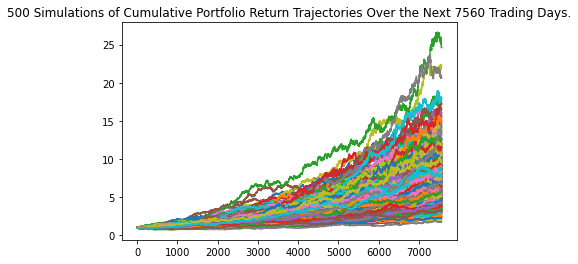

In [136]:
# Plot simulation outcomes
line_plot = MC_portfolio.plot_simulation()

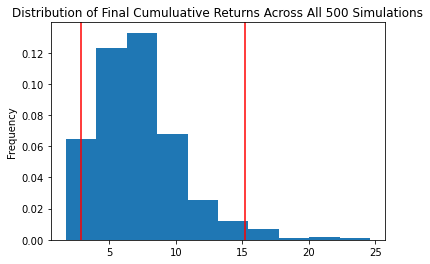

In [137]:
# Plot probability distribution and confidence intervals
dist_plot = MC_portfolio.plot_distribution()

### Retirement Analysis

In [138]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_tbl = MC_portfolio.summarize_cumulative_return()

# Print summary statistics
print(summary_tbl)

count           500.000000
mean              7.216461
std               3.218466
min               1.732195
25%               4.913494
50%               6.689389
75%               8.705634
max              24.616133
95% CI Lower      2.864833
95% CI Upper     15.242006
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [139]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary_tbl[8]*initial_investment,2)
ci_upper = round(summary_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $57296.67 and $304840.12


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [140]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary_tbl[8]*initial_investment,2)
ci_upper = round(summary_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $85945.0 and $457260.19


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")